In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"

In [3]:
%cd /content/gdrive/My Drive/Kaggle

/content/gdrive/My Drive/Kaggle


In [4]:
!kaggle datasets download -d nowke9/ipldata

  0% 0.00/1.20M [00:00<?, ?B/s]
100% 1.20M/1.20M [00:00<00:00, 39.8MB/s]


In [5]:
!ls

deliveries.csv	ipldata.zip  kaggle.json  matches.csv


In [6]:
!unzip \*.zip  && rm *.zip

Archive:  ipldata.zip
replace deliveries.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace matches.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style(style='darkgrid')

In [9]:
data=pd.read_csv('deliveries.csv')
data.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [10]:
data2= pd.read_csv('matches.csv')
data2.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [11]:
data_f = data2.loc[data2.team1.isin(['Rajasthan Royals','Kings XI Punjab'])] 
data_f = data_f.loc[data_f.team2.isin(['Rajasthan Royals','Kings XI Punjab'])] 
data_f

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
64,65,2008,Jaipur,2008-04-21,Kings XI Punjab,Rajasthan Royals,Kings XI Punjab,bat,normal,0,Rajasthan Royals,0,6,SR Watson,Sawai Mansingh Stadium,Aleem Dar,RB Tiffin,NaN
96,97,2008,Chandigarh,2008-05-28,Kings XI Punjab,Rajasthan Royals,Rajasthan Royals,field,normal,0,Kings XI Punjab,41,0,SE Marsh,"Punjab Cricket Association Stadium, Mohali",SJ Davis,K Hariharan,NaN
129,130,2009,Cape Town,2009-04-26,Kings XI Punjab,Rajasthan Royals,Kings XI Punjab,bat,normal,0,Kings XI Punjab,27,0,KC Sangakkara,Newlands,M Erasmus,K Hariharan,NaN
144,145,2009,Durban,2009-05-05,Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,field,normal,0,Rajasthan Royals,78,0,GC Smith,Kingsmead,SS Hazare,IL Howell,NaN
192,193,2010,Chandigarh,2010-03-24,Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,field,normal,0,Rajasthan Royals,31,0,AC Voges,"Punjab Cricket Association Stadium, Mohali",BR Doctrove,SK Tarapore,NaN
211,212,2010,Jaipur,2010-04-07,Kings XI Punjab,Rajasthan Royals,Kings XI Punjab,bat,normal,0,Rajasthan Royals,0,9,MJ Lumb,Sawai Mansingh Stadium,S Ravi,SK Tarapore,NaN
255,256,2011,Chandigarh,2011-04-21,Kings XI Punjab,Rajasthan Royals,Rajasthan Royals,field,normal,0,Kings XI Punjab,48,0,SE Marsh,"Punjab Cricket Association Stadium, Mohali",S Asnani,PR Reiffel,NaN
310,311,2012,Jaipur,2012-04-06,Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,field,normal,0,Rajasthan Royals,31,0,AM Rahane,Sawai Mansingh Stadium,BF Bowden,SK Tarapore,NaN
353,354,2012,Chandigarh,2012-05-05,Rajasthan Royals,Kings XI Punjab,Rajasthan Royals,bat,normal,0,Rajasthan Royals,43,0,SR Watson,"Punjab Cricket Association Stadium, Mohali",JD Cloete,SJA Taufel,NaN
397,398,2013,Jaipur,2013-04-14,Kings XI Punjab,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,6,JP Faulkner,Sawai Mansingh Stadium,Aleem Dar,C Shamshuddin,NaN


**Let's do Q1 now**

RR Wins - 10
KXIP Wins - 9


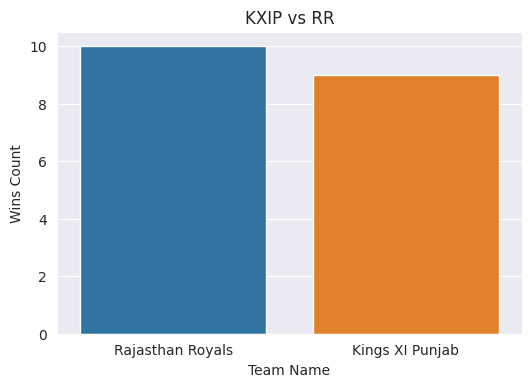

In [13]:
plt.figure(dpi=100)
sns.countplot(x='winner',data = data_f)
plt.ylabel('Wins Count')
plt.xlabel('Team Name')
plt.title('KXIP vs RR')
A,B =data_f.winner.value_counts()

print('RR Wins -',A)
print('KXIP Wins -',B)

plt.show()


Overall it's a bit close , let's analyse past 2 seasons

In [14]:
data_f = data_f.loc[data_f.season.isin(['2017','2018','2019'])] 

RR Wins - 3
KXIP Wins - 1


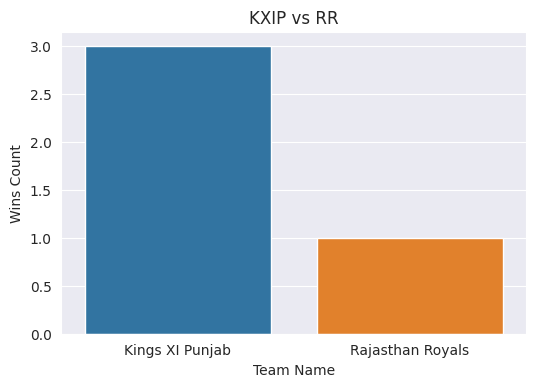

In [15]:
plt.figure(dpi=100)
sns.countplot(x='winner',data = data_f)
plt.ylabel('Wins Count')
plt.xlabel('Team Name')
plt.title('KXIP vs RR')
A,B =data_f.winner.value_counts()

print('RR Wins -',A)
print('KXIP Wins -',B)

plt.show()

Let's go with recent form with KXIP

**Let's do Q2 now**

**Let's find boundaryruns/totalruns ratio**

In [77]:
data_n = data.loc[data.bowling_team.isin(['Kings XI Punjab','Rajasthan Royals'])]
data_n = data_n.loc[data.batting_team.isin(['Kings XI Punjab','Rajasthan Royals'])]
data_n = data_n.loc[data.batsman.isin(['SPD Smith','JC Buttler','KL Rahul','CH Gayle','SV Samson'])]

In [59]:
data_n.batsman.unique()

array(['K Goel', 'JR Hopes', 'KC Sangakkara', 'DPMD Jayawardene',
       'Yuvraj Singh', 'IK Pathan', 'S Sohal', 'B Lee', 'PP Chawla',
       'WA Mota', 'M Kaif', 'YK Pathan', 'Kamran Akmal', 'SR Watson',
       'DS Lehmann', 'RA Jadeja', 'SE Marsh', 'LA Pomersbach',
       'Niraj Patel', 'Younis Khan', 'M Rawat', 'D Salunkhe',
       'Pankaj Singh', 'RS Bopara', 'SA Asnodkar', 'GC Smith',
       'RJ Quiney', 'AD Mascarenhas', 'AS Raut', 'SK Warne', 'NV Ojha',
       'LA Carseldine', 'SM Katich', 'RR Powar', 'S Sreesanth', 'MJ Lumb',
       'FY Fazal', 'AC Voges', 'P Dogra', 'MS Bisla', 'J Theron',
       'SJ Srivastava', 'Bipul Sharma', 'AC Gilchrist', 'PC Valthaty',
       'KD Karthik', 'AM Nayar', 'R McLaren', 'Sunny Singh', 'R Dravid',
       'STR Binny', 'LRPL Taylor', 'AL Menaria', 'DH Yagnik', 'AM Rahane',
       'BJ Hodge', 'OA Shah', 'KK Cooper', 'Mandeep Singh', 'DJ Hussey',
       'JP Faulkner', 'P Kumar', 'Harmeet Singh', 'J Botha', 'N Saini',
       'Azhar Mahmood', 'Gurke

In [78]:
data_kr = data_n.groupby(['batsman']).apply(lambda data_n:(data_n.batsman_runs.value_counts())).reset_index(name='Runs')
data_kr

,batsman,level_1,Runs
0,CH Gayle,0,33
1,CH Gayle,1,29
2,CH Gayle,4,14
3,CH Gayle,6,7
4,CH Gayle,2,4
5,JC Buttler,1,66
6,JC Buttler,0,48
7,JC Buttler,4,28
8,JC Buttler,2,12
9,JC Buttler,6,5


In [80]:
data_kr.rename(columns = {'level_1':'Type_Run'}, inplace = True) 

In [81]:
data_kr =  data_kr.loc[data_kr.Type_Run.isin(['4','6'])]
data_kr

,batsman,Type_Run,Runs
2,CH Gayle,4,14
3,CH Gayle,6,7
7,JC Buttler,4,28
9,JC Buttler,6,5
13,KL Rahul,4,23
15,KL Rahul,6,7
18,SPD Smith,4,12
20,SPD Smith,6,1
24,SV Samson,4,19
26,SV Samson,6,9


In [83]:
data_kr.rename(columns = {'Type_Run':'Boundaries'}, inplace = True) 
data_kr.rename(columns = {'Runs':'Boundaries_Count'}, inplace = True) 
data_kr

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4304: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,batsman,Boundaries,Boundaries_Count
2,CH Gayle,4,14
3,CH Gayle,6,7
7,JC Buttler,4,28
9,JC Buttler,6,5
13,KL Rahul,4,23
15,KL Rahul,6,7
18,SPD Smith,4,12
20,SPD Smith,6,1
24,SV Samson,4,19
26,SV Samson,6,9


In [86]:
data_kr['Boundary_Runs'] = data_kr['Boundaries'] * data_kr['Boundaries_Count']
data_kr

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,batsman,Boundaries,Boundaries_Count,Boundary_Runs
2,CH Gayle,4,14,56
3,CH Gayle,6,7,42
7,JC Buttler,4,28,112
9,JC Buttler,6,5,30
13,KL Rahul,4,23,92
15,KL Rahul,6,7,42
18,SPD Smith,4,12,48
20,SPD Smith,6,1,6
24,SV Samson,4,19,76
26,SV Samson,6,9,54


In [88]:
data_kr.drop(['Boundaries','Boundaries_Count'], axis = 1) 

,batsman,Boundary_Runs
2,CH Gayle,56
3,CH Gayle,42
7,JC Buttler,112
9,JC Buttler,30
13,KL Rahul,92
15,KL Rahul,42
18,SPD Smith,48
20,SPD Smith,6
24,SV Samson,76
26,SV Samson,54


In [94]:
data_rk = data_kr.groupby(['batsman']).apply(lambda data_n:(data_n.Boundary_Runs.sum())).reset_index(name='Boundary_Runs')
data_rk

,batsman,Boundary_Runs
0,CH Gayle,98
1,JC Buttler,142
2,KL Rahul,134
3,SPD Smith,54
4,SV Samson,130


In [95]:
data_kr2 = data_n.groupby(['batsman']).apply(lambda data_n:(data_n.batsman_runs.sum())).reset_index(name='Total_Runs')
data_kr2

,batsman,Total_Runs
0,CH Gayle,135
1,JC Buttler,238
2,KL Rahul,244
3,SPD Smith,89
4,SV Samson,276


In [102]:
data_kxrr = data_rk.join(data_kr2['Total_Runs'])
data_kxrr

,batsman,Boundary_Runs,Total_Runs
0,CH Gayle,98,135
1,JC Buttler,142,238
2,KL Rahul,134,244
3,SPD Smith,54,89
4,SV Samson,130,276


Finally we have got our desired results.

Let's find boundary runs ratio to total ratio now

In [103]:
data_kxrr['Boundary_Runs_Percentage'] = (data_kxrr['Boundary_Runs'] / data_kxrr['Total_Runs']) * 100
data_kxrr

,batsman,Boundary_Runs,Total_Runs,Boundary_Runs_Percentage
0,CH Gayle,98,135,72.592593
1,JC Buttler,142,238,59.663866
2,KL Rahul,134,244,54.918033
3,SPD Smith,54,89,60.674157
4,SV Samson,130,276,47.101449


Clearly CH Gayle has highest Boundaries percentage out of all batsman. Let's mark it .

**For Q3, Let's do Compute OPP**



It will take time and I was busy throughout the day.

Hence, marking with my domain knowledge OPP as 1 option CH Gayle (Also because above I found it) and Jofra Archer.


**Let's do Q4**


**Let's find average dot balls in KXIP v RR contest**

In [104]:
data_c = data.loc[data.bowling_team.isin(['Kings XI Punjab','Rajasthan Royals'])]
data_c = data_c.loc[data_c.batting_team.isin(['Kings XI Punjab','Rajasthan Royals'])]


In [105]:
data_c.total_runs.value_counts()

1    1850
0    1610
4     573
2     374
6     207
3      34
5      11
8       4
Name: total_runs, dtype: int64

In [106]:
data_c.match_id.nunique()

19

In [107]:
np.round(1610/19,2) # Average dotball in KXIP v RR contest

84.74

Let's mark 60-90 considering our analysis

**Let's do Q5 now**

**Let's find Shami's stats v RR**

In [110]:

data_s = data_s.loc[data.batting_team.isin(['Rajasthan Royals'])]

In [111]:
data_s = data_s.loc[data_s.bowler.isin(['Mohammed Shami'])]

In [114]:
data_s.match_id.nunique()

2

In [113]:
data_ms = data_s.groupby(['match_id','over']).apply(lambda data_s:(data_s.player_dismissed.value_counts().sum())).reset_index(name='Wickets')
data_ms

,match_id,over,Wickets
0,11140,3,0
1,11140,5,0
2,11140,16,0
3,11140,19,1
4,11323,9,0
5,11323,13,0
6,11323,18,1
7,11323,20,1


Well Shami has played 2 matches and both time he took wicket in the death.
So, let's mark last option

Thank You again for this amazing internship.

Looking forward to it tomorrow.

Regards,

Ashaab Rizvi

